In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')



## Simple aggregation using the mean

In [4]:
with open(os.path.join(config_dir,'mnist_regression_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 2,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 200,
  'max_funcs': 300,
  'min_contx': 100,
  'min_funcs': 200,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'mu_gen': 0,
 'data_kwargs': {'datagenerator': 'cnp.datageneration.TwoDImageRegression',
  'init_kwargs': {'height': 28,
   'link': '~/.pytorch/MNIST_data/',
   'scale_mean': 0.5,
   'scale_std': 0.5,
   'share_train_data': 0.8,
   'width': 28},
  'num_instances_train': 32,
  'num_instances_vali': 5,
  'num_instances_test': 1},
 'experiment_params': {'lr': 0.001,
  'n_epochs': 100000,
  'seed': None,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 32,
  'batch_size_vali': 5,
  'batch_size_test': 1,
  'plotting': True,
  'print_after': 100,
  'plot_mode': '2d_greyscale'}}

In [6]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None


In [7]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         0.72
Mean Validation loss after 0 equals                     0.695

Validation loss for the function plotted:                 0.695
2d_greyscale


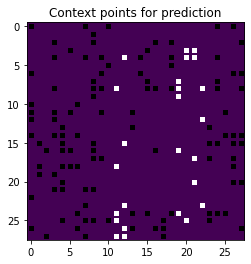

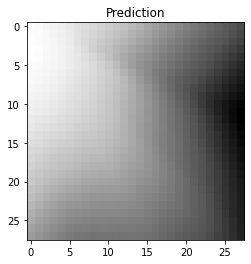

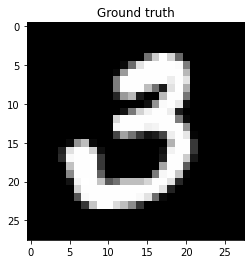

  0%|          | 99/100000 [00:07<1:57:12, 14.20it/s]

Mean training loss at epoch 100 :                         -0.155
Mean Validation loss after 100 equals                     -0.102

Validation loss for the function plotted:                 -0.102
2d_greyscale


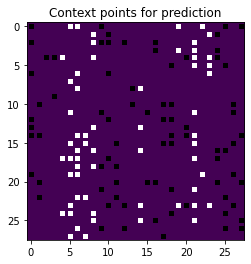

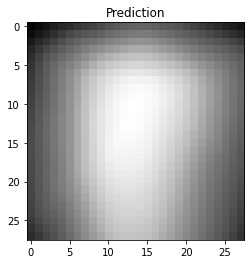

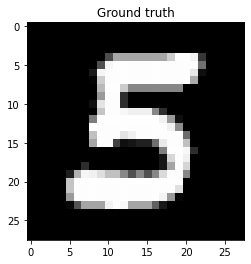

  0%|          | 199/100000 [00:14<1:46:49, 15.57it/s]

Mean training loss at epoch 200 :                         -0.268
Mean Validation loss after 200 equals                     -0.462

Validation loss for the function plotted:                 -0.462
2d_greyscale


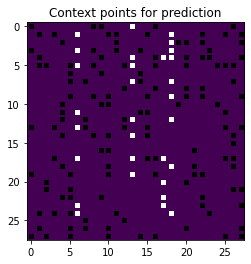

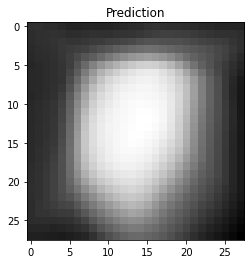

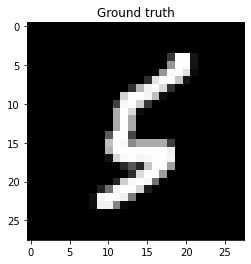

  0%|          | 299/100000 [00:22<1:47:33, 15.45it/s]

Mean training loss at epoch 300 :                         -0.224
Mean Validation loss after 300 equals                     -0.358

Validation loss for the function plotted:                 -0.358
2d_greyscale


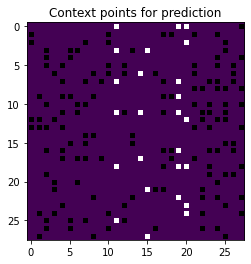

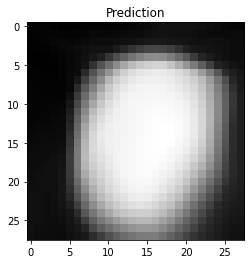

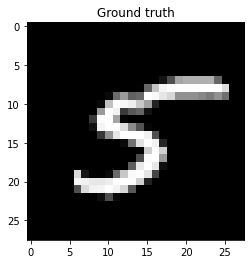

  0%|          | 348/100000 [00:27<2:10:35, 12.72it/s]


KeyboardInterrupt: 

In [8]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'],
    plot_mode=default_conf['train_kwargs']['plot_mode'])


In [12]:
 MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

NameError: name 'state_dict_encoder' is not defined

In [ ]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_simple_mean', to_save)

## Simple aggregation using the max as aggregation

In [45]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False


default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'max'    
    
    
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

  0%|          | 0/100000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None


AttributeError: 'torch.return_types.max' object has no attribute 'unsqueeze'

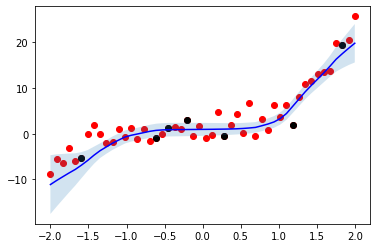

7.093549728393555


In [ ]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [ ]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_simple_sum', to_save)

## Simple aggregation using the sum operation  as aggregation

  0%|          | 0/10000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mean training loss at epoch 0 :                         23.698
Mean Validation loss after 0 equals                     14.781

Validation loss for the function plotted:                 14.781


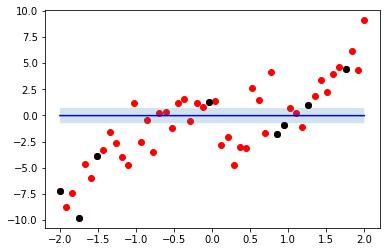

  1%|          | 94/10000 [00:01<02:58, 55.54it/s]

Mean training loss at epoch 100 :                         3.857
Mean Validation loss after 100 equals                     3.186

Validation loss for the function plotted:                 3.186


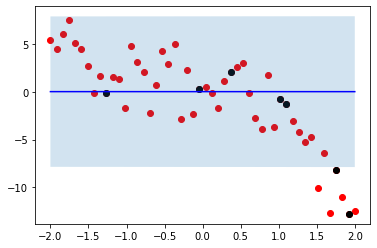

  2%|▏         | 199/10000 [00:03<03:00, 54.37it/s]

Mean training loss at epoch 200 :                         3.163
Mean Validation loss after 200 equals                     4.281

Validation loss for the function plotted:                 4.281


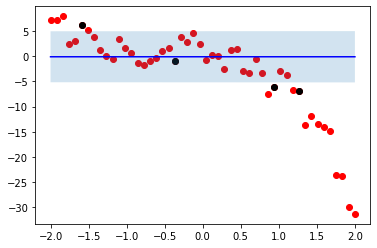

  3%|▎         | 298/10000 [00:05<02:32, 63.57it/s]

Mean training loss at epoch 300 :                         3.381
Mean Validation loss after 300 equals                     3.494

Validation loss for the function plotted:                 3.494


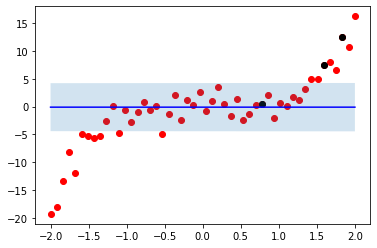

  4%|▍         | 396/10000 [00:07<02:22, 67.54it/s]

Mean training loss at epoch 400 :                         3.346
Mean Validation loss after 400 equals                     3.312

Validation loss for the function plotted:                 3.312


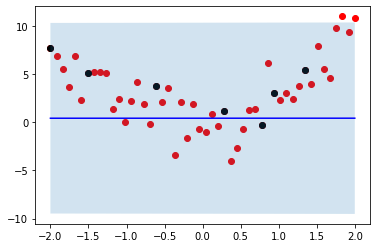

  5%|▍         | 499/10000 [00:08<02:16, 69.37it/s]

Mean training loss at epoch 500 :                         3.582
Mean Validation loss after 500 equals                     3.512

Validation loss for the function plotted:                 3.512


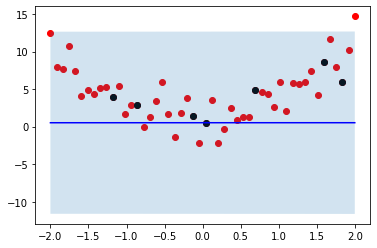

  6%|▌         | 600/10000 [00:10<02:11, 71.62it/s]

Mean training loss at epoch 600 :                         3.324
Mean Validation loss after 600 equals                     3.107

Validation loss for the function plotted:                 3.107


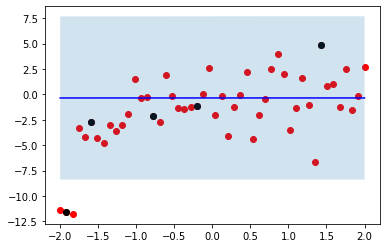

  7%|▋         | 698/10000 [00:12<02:18, 67.34it/s]

Mean training loss at epoch 700 :                         3.302
Mean Validation loss after 700 equals                     3.829

Validation loss for the function plotted:                 3.829


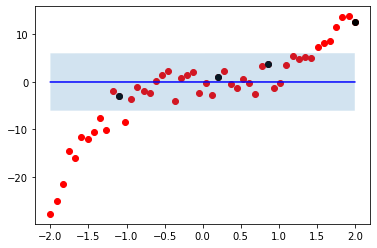

  8%|▊         | 798/10000 [00:13<02:38, 58.01it/s]

Mean training loss at epoch 800 :                         3.205
Mean Validation loss after 800 equals                     3.595

Validation loss for the function plotted:                 3.595


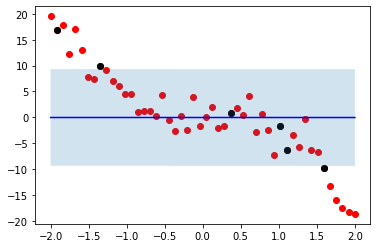

  9%|▉         | 897/10000 [00:16<02:47, 54.30it/s]

Mean training loss at epoch 900 :                         3.378
Mean Validation loss after 900 equals                     3.383

Validation loss for the function plotted:                 3.383


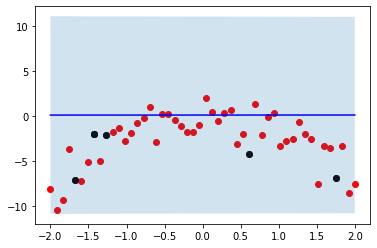

 10%|▉         | 996/10000 [00:18<02:28, 60.74it/s]

Mean training loss at epoch 1000 :                         3.228
Mean Validation loss after 1000 equals                     2.995

Validation loss for the function plotted:                 2.995


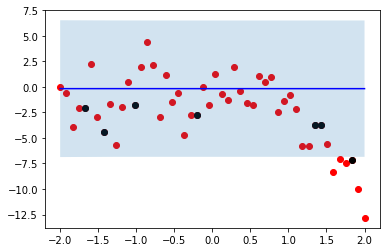

 11%|█         | 1095/10000 [00:19<02:32, 58.39it/s]

Mean training loss at epoch 1100 :                         3.086
Mean Validation loss after 1100 equals                     4.152

Validation loss for the function plotted:                 4.152


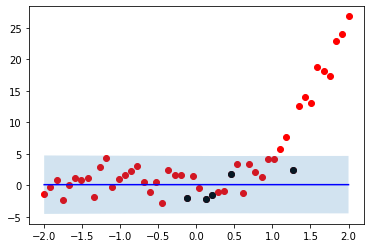

 12%|█▏        | 1198/10000 [00:21<02:41, 54.38it/s]

Mean training loss at epoch 1200 :                         3.359
Mean Validation loss after 1200 equals                     2.849

Validation loss for the function plotted:                 2.849


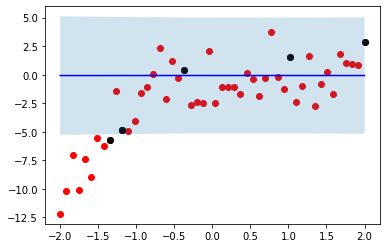

 13%|█▎        | 1294/10000 [00:23<02:20, 61.91it/s]

Mean training loss at epoch 1300 :                         3.379
Mean Validation loss after 1300 equals                     2.892

Validation loss for the function plotted:                 2.892


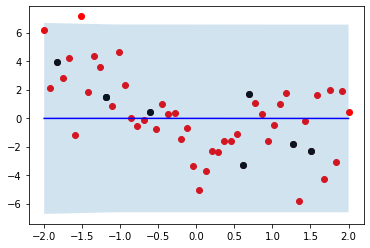

 14%|█▍        | 1399/10000 [00:25<02:06, 68.15it/s]

Mean training loss at epoch 1400 :                         3.177
Mean Validation loss after 1400 equals                     6.38

Validation loss for the function plotted:                 6.38


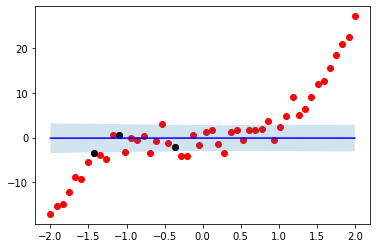

 15%|█▍        | 1494/10000 [00:26<02:04, 68.23it/s]

Mean training loss at epoch 1500 :                         3.116
Mean Validation loss after 1500 equals                     3.089

Validation loss for the function plotted:                 3.089


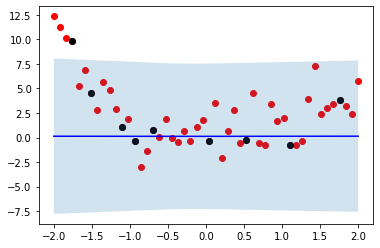

 16%|█▌        | 1595/10000 [00:28<02:06, 66.45it/s]

Mean training loss at epoch 1600 :                         3.252
Mean Validation loss after 1600 equals                     2.589

Validation loss for the function plotted:                 2.589


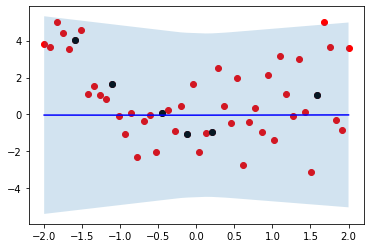

 17%|█▋        | 1696/10000 [00:30<03:27, 40.08it/s]

Mean training loss at epoch 1700 :                         2.736
Mean Validation loss after 1700 equals                     3.731

Validation loss for the function plotted:                 3.731


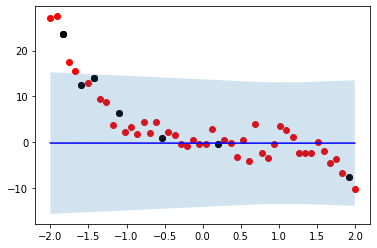

 18%|█▊        | 1796/10000 [00:32<02:34, 53.21it/s]

Mean training loss at epoch 1800 :                         3.173
Mean Validation loss after 1800 equals                     2.915

Validation loss for the function plotted:                 2.915


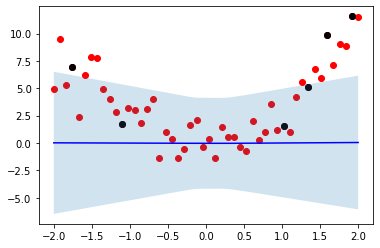

 19%|█▉        | 1896/10000 [00:34<01:57, 68.68it/s]

Mean training loss at epoch 1900 :                         3.306
Mean Validation loss after 1900 equals                     3.328

Validation loss for the function plotted:                 3.328


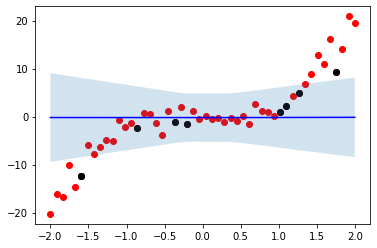

 20%|██        | 2000/10000 [00:36<02:12, 60.50it/s]

Mean training loss at epoch 2000 :                         3.126
Mean Validation loss after 2000 equals                     3.014

Validation loss for the function plotted:                 3.014


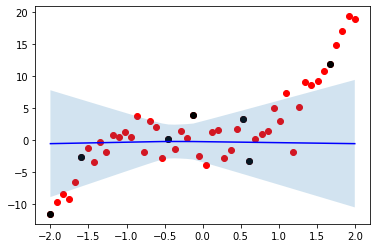

 21%|██        | 2098/10000 [00:38<02:07, 62.03it/s]

Mean training loss at epoch 2100 :                         2.859
Mean Validation loss after 2100 equals                     2.807

Validation loss for the function plotted:                 2.807


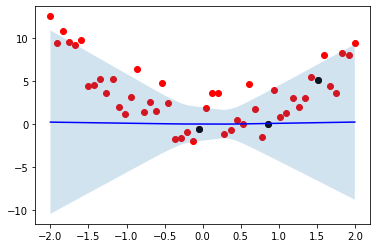

 22%|██▏       | 2198/10000 [00:39<01:57, 66.32it/s]

Mean training loss at epoch 2200 :                         2.859
Mean Validation loss after 2200 equals                     3.145

Validation loss for the function plotted:                 3.145


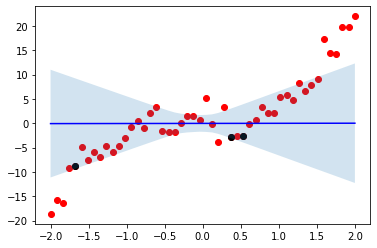

 23%|██▎       | 2295/10000 [00:41<01:57, 65.55it/s]

Mean training loss at epoch 2300 :                         2.907
Mean Validation loss after 2300 equals                     2.537

Validation loss for the function plotted:                 2.537


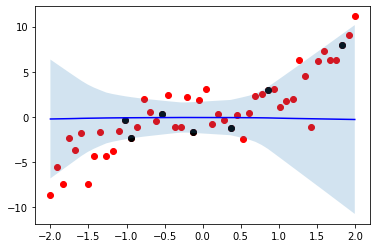

 24%|██▍       | 2394/10000 [00:43<01:59, 63.64it/s]

Mean training loss at epoch 2400 :                         2.739
Mean Validation loss after 2400 equals                     2.444

Validation loss for the function plotted:                 2.444


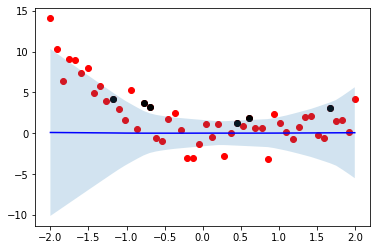

 25%|██▍       | 2497/10000 [00:45<01:59, 62.60it/s]

Mean training loss at epoch 2500 :                         2.726
Mean Validation loss after 2500 equals                     2.941

Validation loss for the function plotted:                 2.941


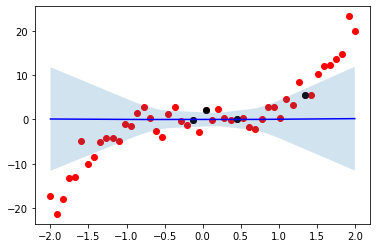

 26%|██▌       | 2595/10000 [00:46<01:53, 65.03it/s]

Mean training loss at epoch 2600 :                         2.771
Mean Validation loss after 2600 equals                     2.181

Validation loss for the function plotted:                 2.181


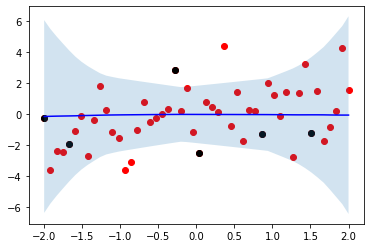

 27%|██▋       | 2698/10000 [00:48<01:54, 64.04it/s]

Mean training loss at epoch 2700 :                         3.095
Mean Validation loss after 2700 equals                     2.511

Validation loss for the function plotted:                 2.511


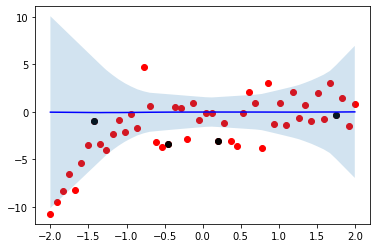

 28%|██▊       | 2799/10000 [00:51<03:37, 33.14it/s]

Mean training loss at epoch 2800 :                         2.813
Mean Validation loss after 2800 equals                     2.672

Validation loss for the function plotted:                 2.672


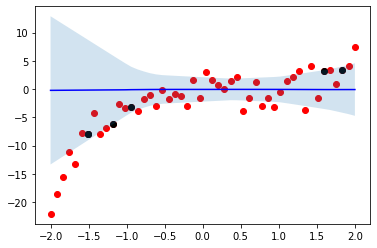

 29%|██▉       | 2897/10000 [00:53<01:47, 66.38it/s]

Mean training loss at epoch 2900 :                         2.778
Mean Validation loss after 2900 equals                     3.072

Validation loss for the function plotted:                 3.072


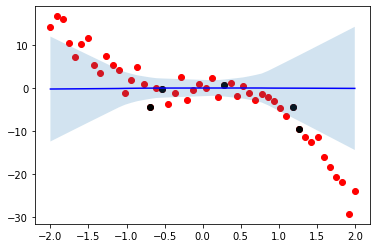

 30%|██▉       | 2998/10000 [00:55<01:45, 66.63it/s]

Mean training loss at epoch 3000 :                         2.674
Mean Validation loss after 3000 equals                     2.772

Validation loss for the function plotted:                 2.772


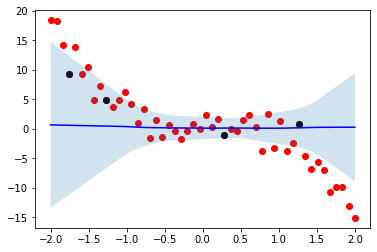

 31%|███       | 3097/10000 [00:56<01:42, 67.24it/s]

Mean training loss at epoch 3100 :                         2.658
Mean Validation loss after 3100 equals                     2.502

Validation loss for the function plotted:                 2.502


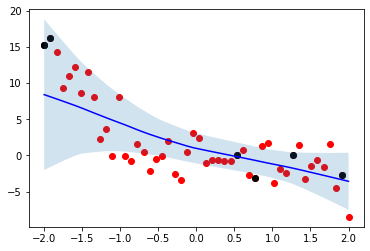

 32%|███▏      | 3195/10000 [00:58<02:07, 53.49it/s]

Mean training loss at epoch 3200 :                         2.622
Mean Validation loss after 3200 equals                     2.737

Validation loss for the function plotted:                 2.737


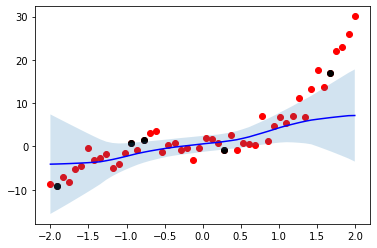

 33%|███▎      | 3297/10000 [01:01<02:03, 54.24it/s]

Mean training loss at epoch 3300 :                         2.504
Mean Validation loss after 3300 equals                     2.548

Validation loss for the function plotted:                 2.548


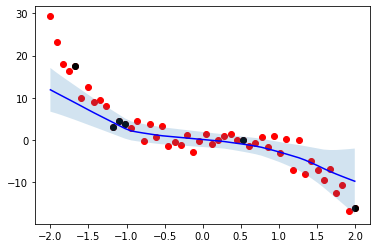

 34%|███▍      | 3399/10000 [01:03<02:19, 47.38it/s]

Mean training loss at epoch 3400 :                         3.013
Mean Validation loss after 3400 equals                     2.435

Validation loss for the function plotted:                 2.435


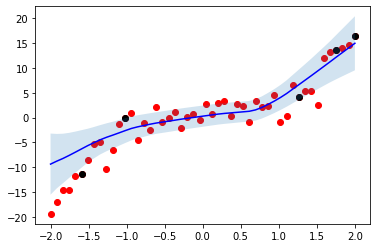

 35%|███▍      | 3497/10000 [01:06<02:30, 43.19it/s]

Mean training loss at epoch 3500 :                         2.327
Mean Validation loss after 3500 equals                     2.686

Validation loss for the function plotted:                 2.686


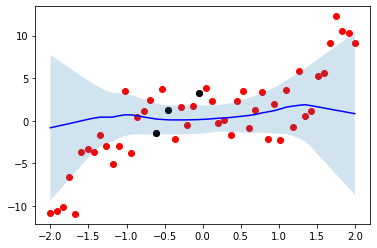

 36%|███▌      | 3595/10000 [01:08<02:04, 51.45it/s]

Mean training loss at epoch 3600 :                         2.215
Mean Validation loss after 3600 equals                     2.248

Validation loss for the function plotted:                 2.248


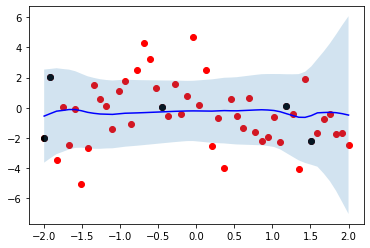

 37%|███▋      | 3696/10000 [01:10<01:38, 64.20it/s]

Mean training loss at epoch 3700 :                         2.193
Mean Validation loss after 3700 equals                     2.218

Validation loss for the function plotted:                 2.218


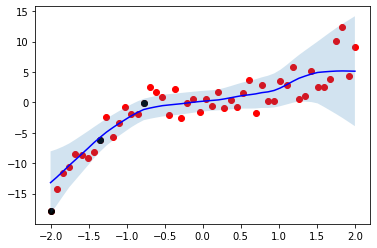

 38%|███▊      | 3795/10000 [01:12<01:33, 66.12it/s]

Mean training loss at epoch 3800 :                         2.661
Mean Validation loss after 3800 equals                     2.3

Validation loss for the function plotted:                 2.3


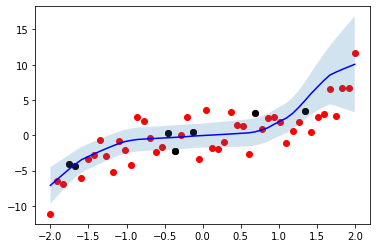

 39%|███▉      | 3895/10000 [01:13<01:45, 58.04it/s]

Mean training loss at epoch 3900 :                         2.52
Mean Validation loss after 3900 equals                     2.242

Validation loss for the function plotted:                 2.242


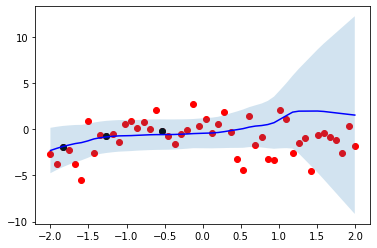

 40%|███▉      | 3999/10000 [01:16<02:45, 36.36it/s]

Mean training loss at epoch 4000 :                         2.295
Mean Validation loss after 4000 equals                     2.233

Validation loss for the function plotted:                 2.233


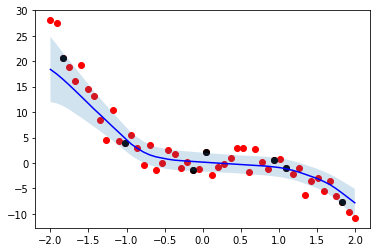

 41%|████      | 4096/10000 [01:19<02:11, 44.74it/s]

Mean training loss at epoch 4100 :                         2.322
Mean Validation loss after 4100 equals                     2.487

Validation loss for the function plotted:                 2.487


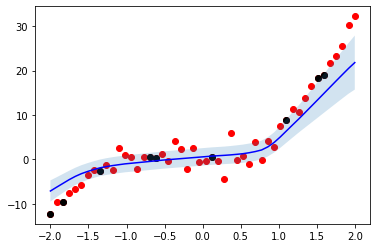

 42%|████▏     | 4199/10000 [01:21<01:38, 59.17it/s]

Mean training loss at epoch 4200 :                         2.44
Mean Validation loss after 4200 equals                     2.43

Validation loss for the function plotted:                 2.43


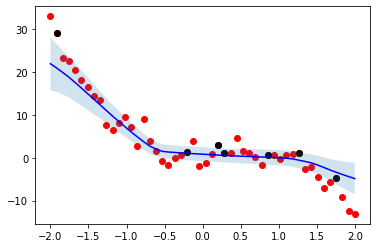

 43%|████▎     | 4297/10000 [01:24<03:03, 31.11it/s]

Mean training loss at epoch 4300 :                         2.643
Mean Validation loss after 4300 equals                     2.827

Validation loss for the function plotted:                 2.827


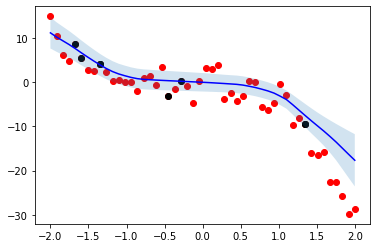

 44%|████▍     | 4395/10000 [01:27<01:45, 53.24it/s]

Mean training loss at epoch 4400 :                         2.126
Mean Validation loss after 4400 equals                     2.611

Validation loss for the function plotted:                 2.611


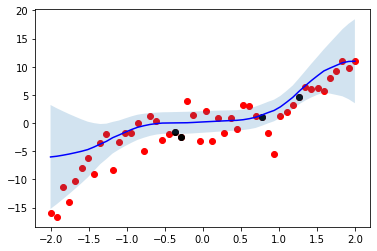

 45%|████▍     | 4496/10000 [01:29<04:52, 18.79it/s]

Mean training loss at epoch 4500 :                         2.226
Mean Validation loss after 4500 equals                     2.991

Validation loss for the function plotted:                 2.991


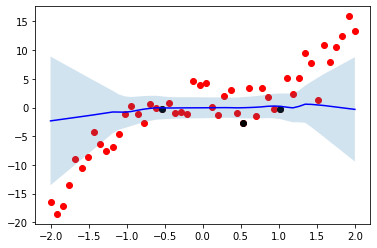

 46%|████▌     | 4597/10000 [01:33<02:11, 41.11it/s]

Mean training loss at epoch 4600 :                         2.155
Mean Validation loss after 4600 equals                     2.744

Validation loss for the function plotted:                 2.744


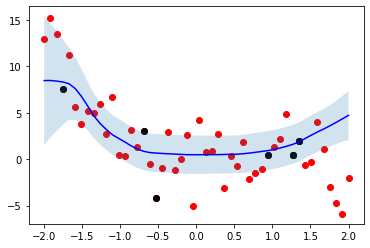

 47%|████▋     | 4695/10000 [01:35<01:28, 60.01it/s]

Mean training loss at epoch 4700 :                         2.326
Mean Validation loss after 4700 equals                     2.338

Validation loss for the function plotted:                 2.338


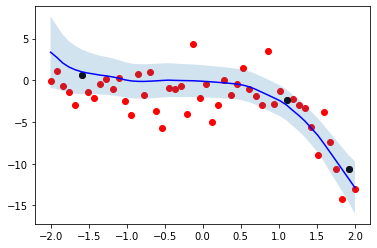

 48%|████▊     | 4797/10000 [01:37<02:15, 38.49it/s]

Mean training loss at epoch 4800 :                         2.122
Mean Validation loss after 4800 equals                     2.234

Validation loss for the function plotted:                 2.234


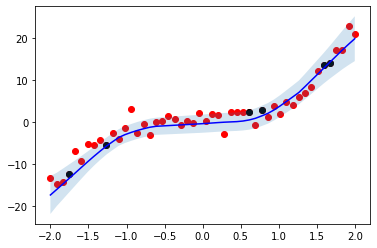

 49%|████▉     | 4896/10000 [01:40<02:20, 36.36it/s]

Mean training loss at epoch 4900 :                         2.319
Mean Validation loss after 4900 equals                     2.032

Validation loss for the function plotted:                 2.032


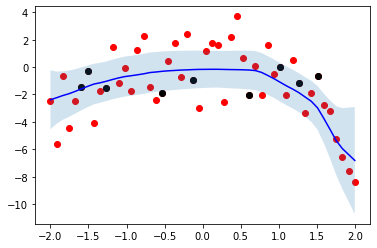

 50%|████▉     | 4995/10000 [01:43<01:49, 45.67it/s]

Mean training loss at epoch 5000 :                         2.167
Mean Validation loss after 5000 equals                     2.214

Validation loss for the function plotted:                 2.214


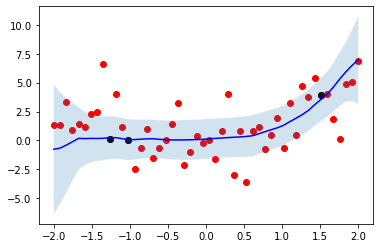

 51%|█████     | 5096/10000 [01:45<01:28, 55.59it/s]

Mean training loss at epoch 5100 :                         2.457
Mean Validation loss after 5100 equals                     2.349

Validation loss for the function plotted:                 2.349


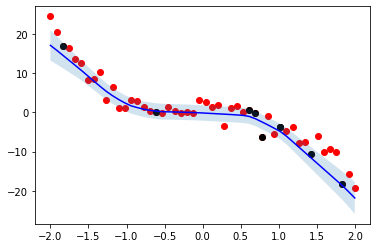

 52%|█████▏    | 5196/10000 [01:47<01:32, 51.94it/s]

Mean training loss at epoch 5200 :                         2.16
Mean Validation loss after 5200 equals                     2.366

Validation loss for the function plotted:                 2.366


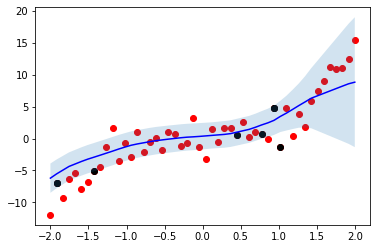

 53%|█████▎    | 5296/10000 [01:49<02:03, 38.05it/s]

Mean training loss at epoch 5300 :                         2.181
Mean Validation loss after 5300 equals                     2.261

Validation loss for the function plotted:                 2.261


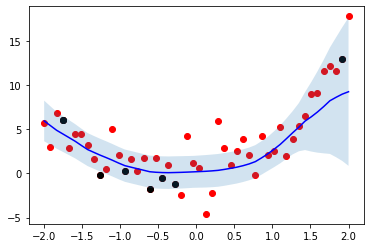

 54%|█████▍    | 5397/10000 [01:51<01:10, 65.22it/s]

Mean training loss at epoch 5400 :                         2.173
Mean Validation loss after 5400 equals                     2.257

Validation loss for the function plotted:                 2.257


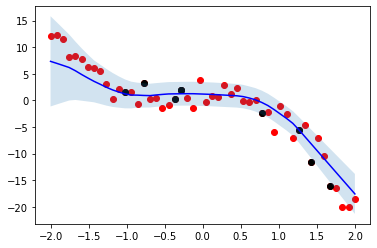

 55%|█████▌    | 5500/10000 [01:53<01:09, 64.33it/s]

Mean training loss at epoch 5500 :                         2.181
Mean Validation loss after 5500 equals                     2.159

Validation loss for the function plotted:                 2.159


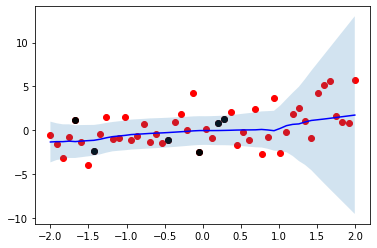

 56%|█████▌    | 5600/10000 [01:54<01:06, 66.51it/s]

Mean training loss at epoch 5600 :                         2.128
Mean Validation loss after 5600 equals                     2.188

Validation loss for the function plotted:                 2.188


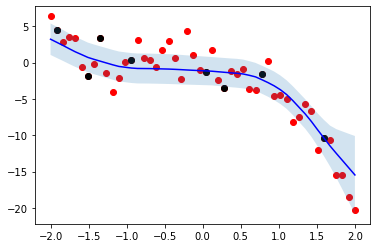

 57%|█████▋    | 5699/10000 [01:56<01:05, 65.98it/s]

Mean training loss at epoch 5700 :                         2.346
Mean Validation loss after 5700 equals                     2.78

Validation loss for the function plotted:                 2.78


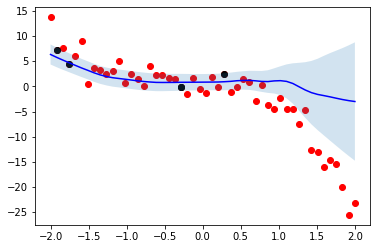

 58%|█████▊    | 5798/10000 [01:58<01:05, 64.63it/s]

Mean training loss at epoch 5800 :                         2.048
Mean Validation loss after 5800 equals                     2.288

Validation loss for the function plotted:                 2.288


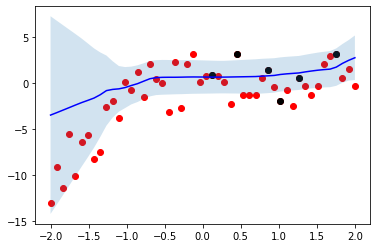

 59%|█████▉    | 5897/10000 [01:59<01:02, 65.69it/s]

Mean training loss at epoch 5900 :                         2.366
Mean Validation loss after 5900 equals                     2.53

Validation loss for the function plotted:                 2.53


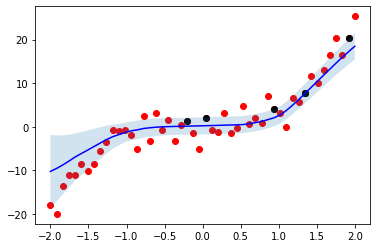

 60%|█████▉    | 5999/10000 [02:02<01:23, 47.92it/s]

Mean training loss at epoch 6000 :                         2.077
Mean Validation loss after 6000 equals                     2.265

Validation loss for the function plotted:                 2.265


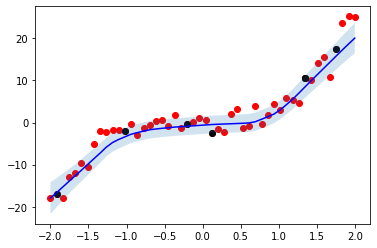

 61%|██████    | 6096/10000 [02:03<00:59, 65.38it/s]

Mean training loss at epoch 6100 :                         2.137
Mean Validation loss after 6100 equals                     2.686

Validation loss for the function plotted:                 2.686


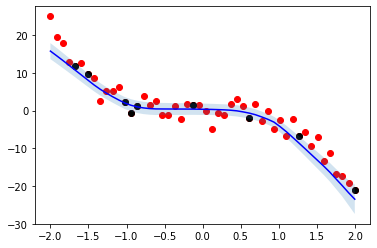

 62%|██████▏   | 6199/10000 [02:05<01:02, 60.74it/s]

Mean training loss at epoch 6200 :                         2.182
Mean Validation loss after 6200 equals                     2.558

Validation loss for the function plotted:                 2.558


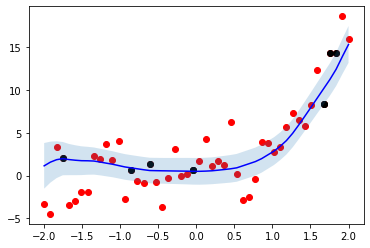

 63%|██████▎   | 6296/10000 [02:07<01:01, 60.32it/s]

Mean training loss at epoch 6300 :                         2.249
Mean Validation loss after 6300 equals                     2.66

Validation loss for the function plotted:                 2.66


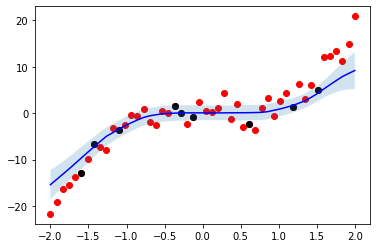

 64%|██████▍   | 6399/10000 [02:09<01:20, 44.73it/s]

Mean training loss at epoch 6400 :                         2.116
Mean Validation loss after 6400 equals                     2.501

Validation loss for the function plotted:                 2.501


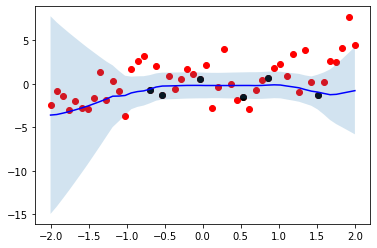

 65%|██████▍   | 6498/10000 [02:12<01:18, 44.46it/s]

Mean training loss at epoch 6500 :                         2.042
Mean Validation loss after 6500 equals                     2.143

Validation loss for the function plotted:                 2.143


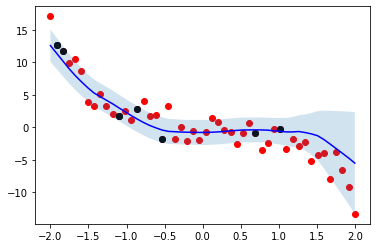

 66%|██████▌   | 6598/10000 [02:14<01:23, 40.52it/s]

Mean training loss at epoch 6600 :                         2.099
Mean Validation loss after 6600 equals                     2.536

Validation loss for the function plotted:                 2.536


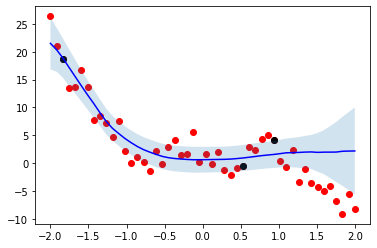

 67%|██████▋   | 6697/10000 [02:16<01:00, 54.63it/s]

Mean training loss at epoch 6700 :                         2.126
Mean Validation loss after 6700 equals                     2.405

Validation loss for the function plotted:                 2.405


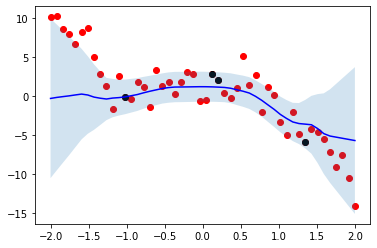

 68%|██████▊   | 6796/10000 [02:18<00:52, 60.84it/s]

Mean training loss at epoch 6800 :                         2.111
Mean Validation loss after 6800 equals                     2.405

Validation loss for the function plotted:                 2.405


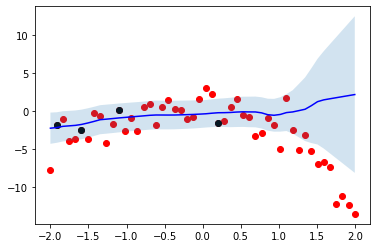

 69%|██████▉   | 6899/10000 [02:20<00:52, 58.73it/s]

Mean training loss at epoch 6900 :                         2.362
Mean Validation loss after 6900 equals                     2.578

Validation loss for the function plotted:                 2.578


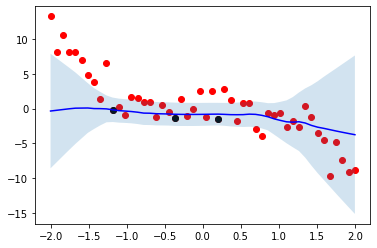

 70%|██████▉   | 6994/10000 [02:22<00:49, 60.24it/s]

Mean training loss at epoch 7000 :                         2.387
Mean Validation loss after 7000 equals                     2.379

Validation loss for the function plotted:                 2.379


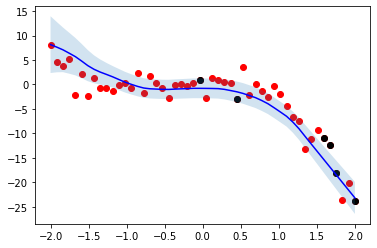

 71%|███████   | 7099/10000 [02:24<00:50, 57.46it/s]

Mean training loss at epoch 7100 :                         2.474
Mean Validation loss after 7100 equals                     2.545

Validation loss for the function plotted:                 2.545


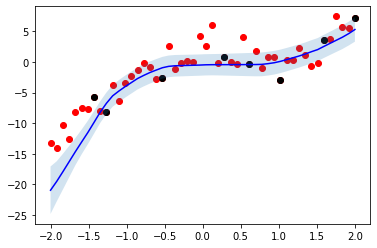

 72%|███████▏  | 7200/10000 [02:26<00:46, 60.51it/s]

Mean training loss at epoch 7200 :                         2.264
Mean Validation loss after 7200 equals                     2.624

Validation loss for the function plotted:                 2.624


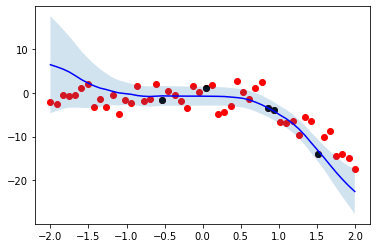

 73%|███████▎  | 7299/10000 [02:28<00:44, 60.23it/s]

Mean training loss at epoch 7300 :                         2.075
Mean Validation loss after 7300 equals                     2.258

Validation loss for the function plotted:                 2.258


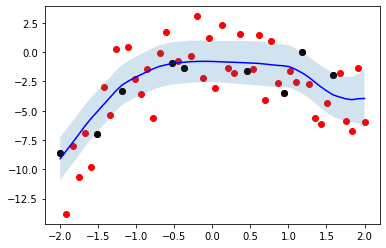

 74%|███████▍  | 7395/10000 [02:30<00:41, 62.92it/s]

Mean training loss at epoch 7400 :                         2.115
Mean Validation loss after 7400 equals                     2.334

Validation loss for the function plotted:                 2.334


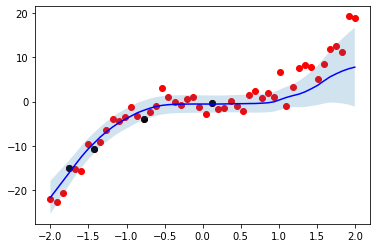

 75%|███████▍  | 7498/10000 [02:33<00:58, 42.59it/s]

Mean training loss at epoch 7500 :                         2.077
Mean Validation loss after 7500 equals                     2.17

Validation loss for the function plotted:                 2.17


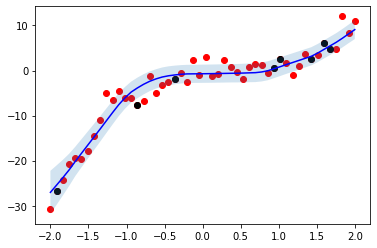

 76%|███████▌  | 7596/10000 [02:35<00:40, 59.44it/s]

Mean training loss at epoch 7600 :                         2.019
Mean Validation loss after 7600 equals                     2.333

Validation loss for the function plotted:                 2.333


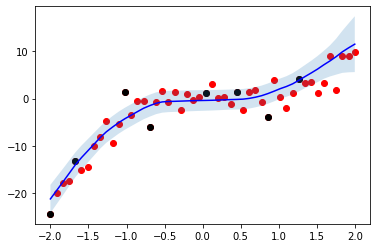

 77%|███████▋  | 7696/10000 [02:37<00:37, 61.00it/s]

Mean training loss at epoch 7700 :                         2.21
Mean Validation loss after 7700 equals                     2.032

Validation loss for the function plotted:                 2.032


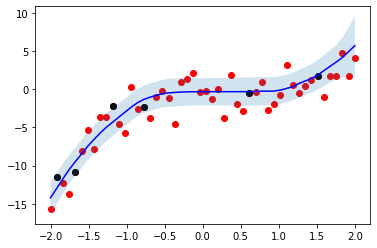

 78%|███████▊  | 7798/10000 [02:38<00:35, 62.20it/s]

Mean training loss at epoch 7800 :                         2.102
Mean Validation loss after 7800 equals                     2.377

Validation loss for the function plotted:                 2.377


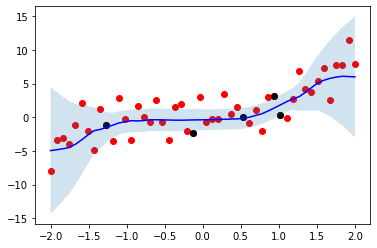

 79%|███████▉  | 7899/10000 [02:40<00:35, 59.51it/s]

Mean training loss at epoch 7900 :                         2.118
Mean Validation loss after 7900 equals                     2.226

Validation loss for the function plotted:                 2.226


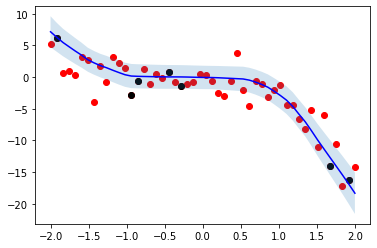

 80%|███████▉  | 7996/10000 [02:43<00:38, 51.84it/s]

Mean training loss at epoch 8000 :                         2.231
Mean Validation loss after 8000 equals                     2.378

Validation loss for the function plotted:                 2.378


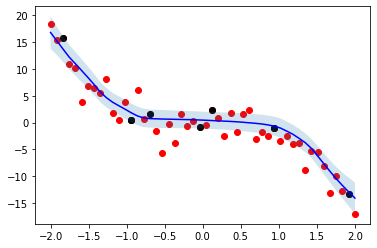

 81%|████████  | 8095/10000 [02:45<00:40, 47.47it/s]

Mean training loss at epoch 8100 :                         2.171
Mean Validation loss after 8100 equals                     2.536

Validation loss for the function plotted:                 2.536


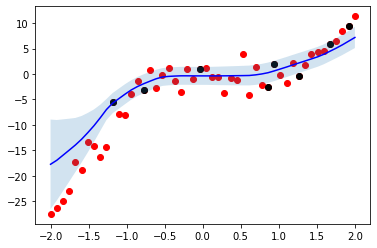

 82%|████████▏ | 8195/10000 [02:48<00:51, 35.12it/s]

Mean training loss at epoch 8200 :                         2.138
Mean Validation loss after 8200 equals                     2.497

Validation loss for the function plotted:                 2.497


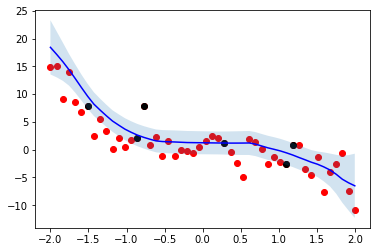

 83%|████████▎ | 8300/10000 [02:50<00:38, 43.95it/s]

Mean training loss at epoch 8300 :                         2.169
Mean Validation loss after 8300 equals                     2.15

Validation loss for the function plotted:                 2.15


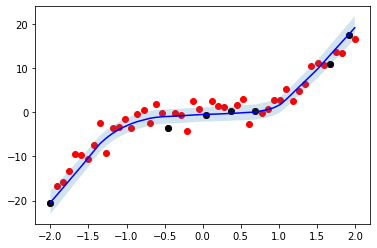

 84%|████████▍ | 8399/10000 [02:53<00:27, 58.83it/s]

Mean training loss at epoch 8400 :                         2.106
Mean Validation loss after 8400 equals                     2.91

Validation loss for the function plotted:                 2.91


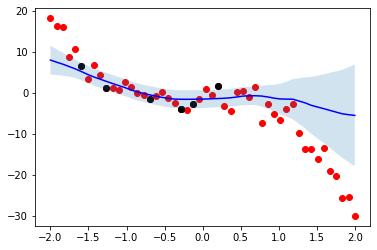

 85%|████████▍ | 8496/10000 [02:54<00:22, 65.75it/s]

Mean training loss at epoch 8500 :                         2.197
Mean Validation loss after 8500 equals                     2.263

Validation loss for the function plotted:                 2.263


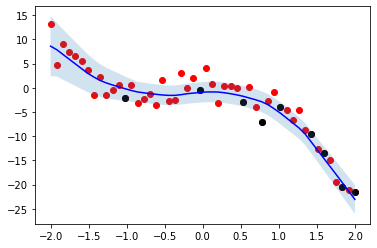

 86%|████████▌ | 8594/10000 [02:56<00:22, 63.76it/s]

Mean training loss at epoch 8600 :                         2.28
Mean Validation loss after 8600 equals                     2.747

Validation loss for the function plotted:                 2.747


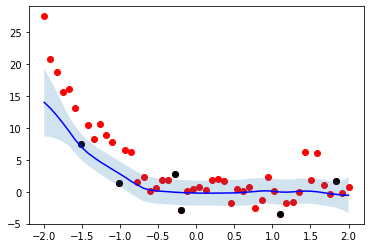

 87%|████████▋ | 8700/10000 [02:58<00:19, 68.05it/s]

Mean training loss at epoch 8700 :                         2.23
Mean Validation loss after 8700 equals                     2.619

Validation loss for the function plotted:                 2.619


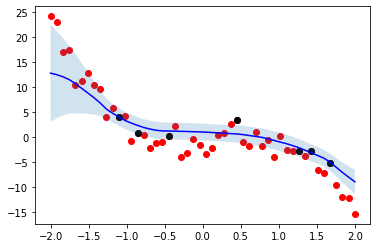

 88%|████████▊ | 8795/10000 [02:59<00:17, 67.90it/s]

Mean training loss at epoch 8800 :                         1.994
Mean Validation loss after 8800 equals                     2.438

Validation loss for the function plotted:                 2.438


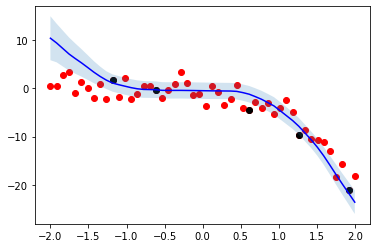

 89%|████████▉ | 8893/10000 [03:01<00:17, 64.04it/s]

Mean training loss at epoch 8900 :                         1.907
Mean Validation loss after 8900 equals                     2.163

Validation loss for the function plotted:                 2.163


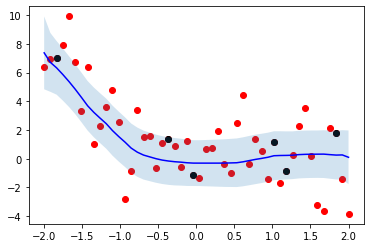

 90%|█████████ | 9000/10000 [03:03<00:15, 64.85it/s]

Mean training loss at epoch 9000 :                         2.01
Mean Validation loss after 9000 equals                     2.472

Validation loss for the function plotted:                 2.472


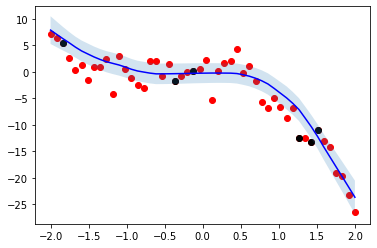

 91%|█████████ | 9099/10000 [03:04<00:13, 66.00it/s]

Mean training loss at epoch 9100 :                         2.308
Mean Validation loss after 9100 equals                     2.28

Validation loss for the function plotted:                 2.28


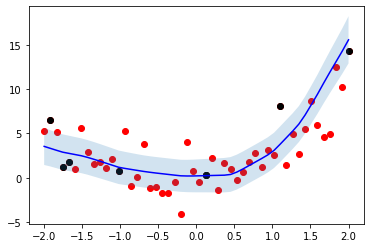

 92%|█████████▏| 9200/10000 [03:06<00:12, 64.96it/s]

Mean training loss at epoch 9200 :                         2.2
Mean Validation loss after 9200 equals                     2.162

Validation loss for the function plotted:                 2.162


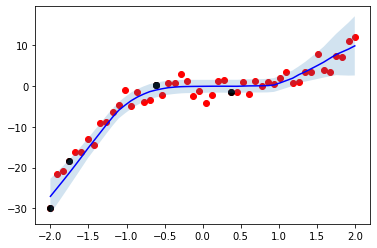

 93%|█████████▎| 9298/10000 [03:08<00:11, 62.28it/s]

Mean training loss at epoch 9300 :                         2.42
Mean Validation loss after 9300 equals                     2.578

Validation loss for the function plotted:                 2.578


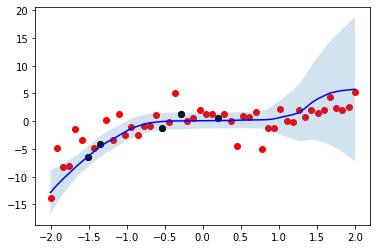

 94%|█████████▍| 9397/10000 [03:09<00:09, 66.29it/s]

Mean training loss at epoch 9400 :                         2.135
Mean Validation loss after 9400 equals                     2.445

Validation loss for the function plotted:                 2.445


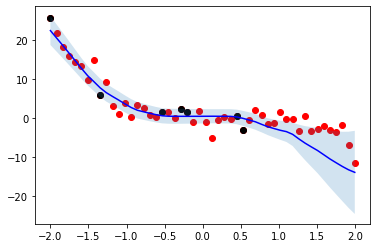

 95%|█████████▍| 9497/10000 [03:11<00:07, 64.93it/s]

Mean training loss at epoch 9500 :                         2.306
Mean Validation loss after 9500 equals                     2.105

Validation loss for the function plotted:                 2.105


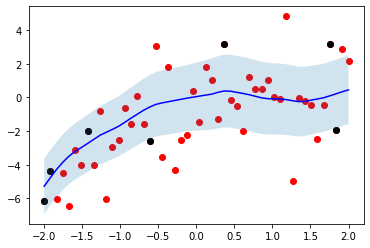

 96%|█████████▌| 9597/10000 [03:13<00:06, 66.57it/s]

Mean training loss at epoch 9600 :                         2.217
Mean Validation loss after 9600 equals                     2.347

Validation loss for the function plotted:                 2.347


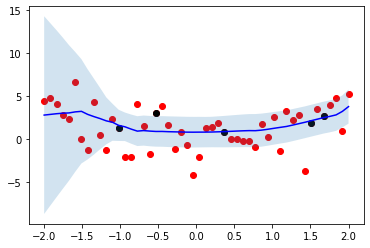

 97%|█████████▋| 9697/10000 [03:15<00:04, 66.56it/s]

Mean training loss at epoch 9700 :                         2.179
Mean Validation loss after 9700 equals                     2.301

Validation loss for the function plotted:                 2.301


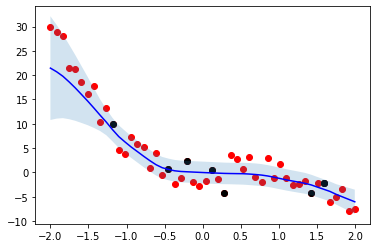

 98%|█████████▊| 9795/10000 [03:16<00:03, 65.99it/s]

Mean training loss at epoch 9800 :                         2.404
Mean Validation loss after 9800 equals                     2.561

Validation loss for the function plotted:                 2.561


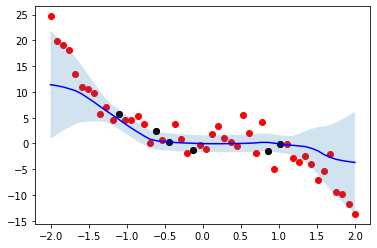

 99%|█████████▉| 9894/10000 [03:18<00:01, 64.39it/s]

Mean training loss at epoch 9900 :                         2.115
Mean Validation loss after 9900 equals                     1.901

Validation loss for the function plotted:                 1.901


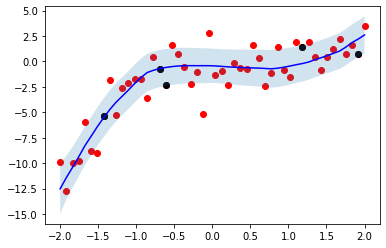

100%|██████████| 10000/10000 [03:20<00:00, 49.95it/s]


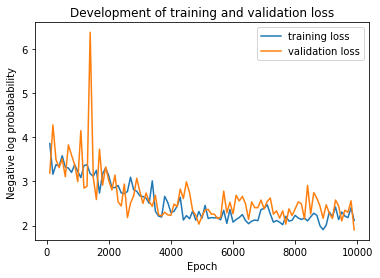

In [ ]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False


default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'sum'    
    
    
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])